<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Вывод-1" data-toc-modified-id="Вывод-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод 1</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Вывод-2" data-toc-modified-id="Вывод-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод 2</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

Датасет с признаками: пол, возраст и зарплата застрахованного, количество членов его семьи. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Задача: защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, и при преобразовании качество моделей машинного обучения не ухудшилось.

План:

- Загрузка, обзор данных.
- Проверка изменения качества линейной регрессии
- Алгоритм преобразования данных для решения задачи

## Загрузка данных

Загружаю необходимые библитотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data[:5]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Информация о данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропуски

In [5]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Дубликаты

In [6]:
data.duplicated().sum()

153

In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Меняю тип данных столбцов Возраст и Зарплата

In [8]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

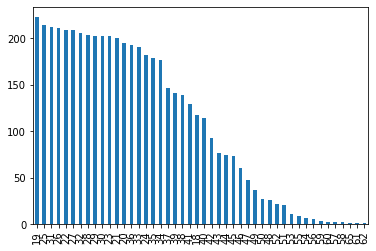

In [9]:
data['Возраст'].value_counts().plot.bar();

In [10]:
data['Зарплата'].value_counts()

45800    29
37100    28
41500    27
43200    27
38800    26
         ..
61200     1
15200     1
71600     1
14300     1
63200     1
Name: Зарплата, Length: 524, dtype: int64

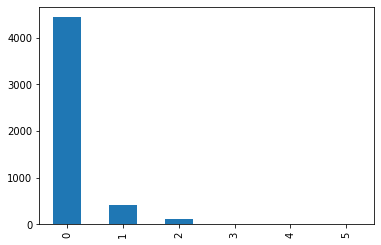

In [11]:
data['Страховые выплаты'].value_counts().plot.bar();

## Вывод 1

Пропуски отсутсвуют, дубликаты удалять не стал, так как могут быть совпадающие значения у разных клиентов
Заменил 2 типа данных на int
Очень хорошие данные, мужчин и женщин поровну, средний возраст 30 лет, средняя з\п 40000, в среднем 1 ребенок в семье. Границы страхования от 18 до 65. Скорее всего представлен средний класс

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Не изменится

Заменим матрицу $X$ на матрицу $Z$:
$$
Z = XP
$$

где $P$ - обратимая матрица с некими значениями, на которую может быть умножена матрица $X$.

**Обоснование:**
Заменим $X$ на $Z$ и вычислим, чему будет равено предсказание и вектор весов.
$$
a_1 = Zw_1
$$
$$
w_1 = (Z^T Z)^{-1} Z^T y
$$

Подставим уравнение правую часть уравнения и получим следущее:
$$
a_1 = Z (Z^T Z)^{-1} Z^T y
$$

Заменим все $Z$ правой частью уравнения:
$$
a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y
$$

Для следующего шага понадобится следующее свойсво обратной матрицы:
$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Раскроем $((XP)^T (XP))^{-1}$:
$$
a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y = XP(P^T X^T XP)^{-1} P^T X^T y
$$

Умножение на единичную матрицу ничего не меняет. Раскроем $(X^T P^T XP)^{-1}$:
$$
a_1 = XP((X^T X) P)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
a_1 = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Умножение приведет к $(P^T)^{-1}  P^T = E$. Посмотрим, что осталось от уравнения
$$
a_1 = XP P^{-1} (X^T X)^{-1} E X^T y
$$
$$
a_1 = XP P^{-1} (X^T X)^{-1} X^T y
$$

Полученную выше формулу можно представить ввиде $p^{-1}w $ так как w по условию $w=(X^T X)^{-1} X^T y$

$$
a_1 = XP(P^{-1} w)
$$

$$
a_1 = Xw
$$

Как видно, значение предсказания $a$ не меняется, если умножать матрицу признаков на обратимую матрицу.

Выделяю признак и целевой признак

In [12]:
features = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']

In [13]:
#записываю формулу линейной регрессии с единичным столбцом:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1) 
y = target
w = np.linalg.inv(X.T @ X) @ X.T @ y          #вычисляю параметр w по формуле минимизации MSE
print('            параметр w:', w[1:])

model = LinearRegression()                    #назначаю модель
model.fit(features, target)                   #обучаю модель
print('оценочные коэффициенты:', model.coef_) #вывожу оценочные коэффициенты для линейной регрессии

            параметр w: [ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]
оценочные коэффициенты: [ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]


Параметр w и оценочный коэффициент полностью совпадают 

In [14]:
print('r2 для исходных признаков:', r2_score(y, model.predict(features))) #вычисляю r2 для модели

random = np.random.normal(size=(4,4)) #генерирую случайную матрицу
np.linalg.inv(random)                 #проверяю матрицу на обратимость
features_inv = features @ random      #изменяю матрицу признаков 
lr = LinearRegression()               #назначаю модель
lr.fit(features_inv, target)          #обучаю модель
print('r2 для измененных признаков:', r2_score(target, lr.predict(features_inv))) #вычисляю r2 для измененных признаков

r2 для исходных признаков: 0.42494550308169177
r2 для измененных признаков: 0.4249455030816912


Значение r2 совпадает с точностью до 13 знаков, так же 1<r2<0

## Вывод 2

Параметр w и оценочные коэффициенты, оценки r2 в исходной задаче и в преобразованной совпадают, следовательно, качество линейной регрессии не изменяется.

## Алгоритм преобразования

**Алгоритм**

Генерирую случайную квадратную матрицу random
Умножаю матрицу признаков на случайную квадратную матрицу random и на константу PI = 3.14

**Обоснование**

Поскольку выше я изменял признаки с помощью случайной матрицы, алгоритм преобразования данных для защиты информации будет с использованием случайной матрицы и константы PI

In [15]:
PI = 3.14

random = np.random.normal(size=(4,4))   #генерирую случайную матрицу
np.linalg.inv(random)                   #проверяю матрицу на обратимость
features_inv = features @ random * PI   #умножаю матрицу признаков на случайную  матрицу и на PI 
features_inv.head(5)

,0,1,2,3
0,67513.794516,102216.330882,-433861.995837,76590.928672
1,51659.856886,78282.950116,-332390.307065,58693.749651
2,28531.340744,43255.516872,-183685.858286,32440.214916
3,56822.655085,85960.035763,-364764.618658,64375.561620
4,35496.974503,53775.680061,-228300.072568,40310.789762


In [16]:
lr = LinearRegression()               #назначаю модель
lr.fit(features_inv, target)          #обучаю модель
print('r2:',
      r2_score(target,
               lr.predict(features_inv))) #вычисляю r2 для измененных признаков

r2: 0.424945503081688


r2 на защищенных данных совпадает с r2 исходных данных, следовательно, алгоритм справляется с защитой данных

## Проверка алгоритма

In [17]:
print('Исходные признаки:')
display(features.head(5)) #вывожу посмотреть исходные признаки

print()

decode = features_inv @ np.linalg.inv(random) * (1/PI)  #можно округлить и привести к целочисленному типу
decode.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи'] #можно и без замены названия признаков, так как это снижает защиту данных
print('Декодированные признаки:')
display(decode.head(5)) #вывожу посмотреть декодированные признаки

Исходные признаки:


,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0



Декодированные признаки:


,Пол,Возраст,Зарплата,Члены семьи
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-9.788805e-12,46.0,38000.0,1.000000e+00
2,-1.267213e-11,29.0,21000.0,5.197295e-13
3,-1.203927e-11,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,2.268776e-12


## Общий вывод

От нас требовалось защитить данные клиентов страховой компании «Хоть потоп» и разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Для защиты информации будет с использоваться случайная матрица и константа PI. После преобразований метрики машинного обучения не изменились.

Таким образом мы выполнили требования поставелнной задачи.